In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [3]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


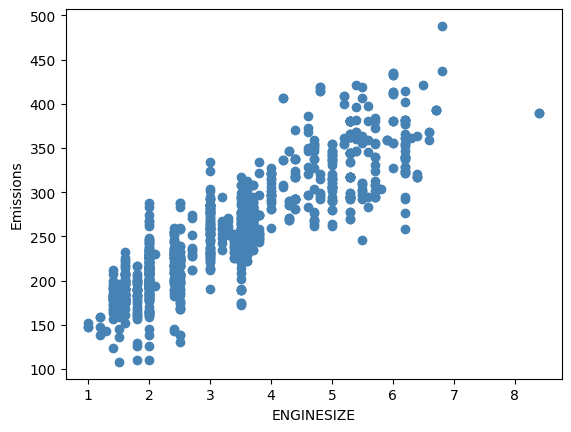

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [5]:
#Train/test split Method 

from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)

In polynomial regression, the relationship between the 
- independent variable =x and 
- dependent variable =y  
is modeled as nth degree polynomial in x .

2nd degree : y = ß0 + (ß1*X1) + ß2*X2²

   - For example, the original feature set has only one feature : **ENGINESIZE**
   - If we select the degree of the polynomial to be 2 :
      - It generates 3 features : degree=0, degree=1,degree=2   --> Coefficients. ß,ß1,ß2

In [7]:
from sklearn.preprocessing import PolynomialFeatures


train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)

In [8]:
train_x_poly=poly.fit_transform(train_x) #Transform to polynomial
print(train_x_poly)

[[ 1.    3.    9.  ]
 [ 1.    6.   36.  ]
 [ 1.    3.    9.  ]
 ...
 [ 1.    2.7   7.29]
 [ 1.    2.    4.  ]
 [ 1.    1.4   1.96]]



y = ß0 + (ß1*X1) + ß2*X2²

- Transformed data looks like feature sets of multiple linear regression analysis.
- Polynomial regression is a special case of linear regression, with selection your features .

**Model**

In [9]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [10]:
train_y_=clf.fit(train_x_poly,train_y)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:",clf.intercept_)

Coefficients: [[ 0.         50.33933908 -1.49660686]]
Intercept: [107.2409724]


**Plot**

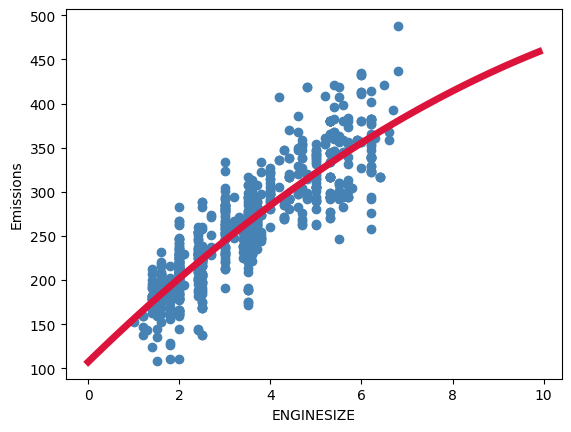

In [15]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="steelblue")
xx=np.arange(0.0,10.0,0.1)#Curve arttırarak plotta görselleştirmede kullanılır. 0-10 arasında x ekseni, 01,0.1 artar
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
#y = ß0 + (ß1*X1) + ß2*X2²

plt.plot(xx,yy,"crimson",linewidth=5)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()


In [19]:
print(f"x line value:",xx)
print(f"y line value: ",yy)

x line value: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
y line value:  [107.2409724  112.25994024 117.24897595 122.20807951 127.13725094
 132.03649023 136.90579738 141.7451724  146.55461528 151.33412602
 156.08370462 160.80335109 165.49306542 170.15284761 174.78269767
 179.38261559 183.95260137 188.49265501 193.00277652 197.48296589
 201.93322312 206.35354822 210.74394117 215.10440199 219.43493068
 223.73552722 228.00619163 232.24692391 236.45772404 240.63859204
 244.7895279  248.91053162 253.00160321 257.06274265 261.09394997
 265.09522514 269.06656818 273.00797908 276.91945784 280.80100446
 284.65261895 288.4743013  292.26605

#### Evaluation 
- Mean Absolute Error (MAE)
- Mean Squarred  Error(MSE)
- 